In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [27]:
data_path = '/Brain Tumor.csv'


# Dataset Prep

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/Brain Tumor.csv')

# Display first few rows
print(df.head())

# Separate features and labels
X = df.drop(['Image', 'Class'], axis=1)
y = df['Class']

# Split dataset into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

# ELM

ELM Accuracy: 0.9787516600265604


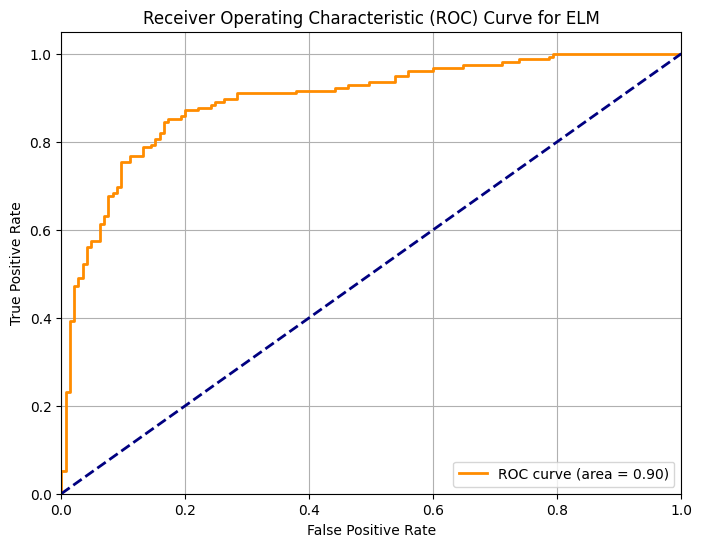

In [65]:
import numpy as np

class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(self.input_size, self.hidden_size)
        self.bias = np.random.randn(self.hidden_size)
        self.output_weights = None
        self.one_hot = False
        self.classes = None

    def _activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation

    def fit(self, X, y):
        # One-hot encode y if multi-class
        if len(np.unique(y)) > 2:
            self.one_hot = True
            self.classes = np.unique(y)
            y_onehot = np.zeros((y.shape[0], len(self.classes)))
            for i, label in enumerate(y):
                y_onehot[i, np.where(self.classes == label)[0][0]] = 1
            y = y_onehot
        else:
            self.one_hot = False
            y = np.array(y).reshape(-1, 1)  # FIXED HERE

        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        self.output_weights = np.dot(np.linalg.pinv(H), y)

    def predict(self, X):
        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        y_pred = np.dot(H, self.output_weights)
        if self.one_hot:
            return self.classes[np.argmax(y_pred, axis=1)]
        else:
            return (y_pred > 0.5).astype(int).flatten()

# Initialize and train ELM
elm = ELM(input_size=X_train.shape[1], hidden_size=100, output_size=1)
elm.fit(X_train, y_train)

# Predict on test set
y_pred_elm = elm.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
elm_accuracy = accuracy_score(y_test, y_pred_elm)
print("ELM Accuracy:", elm_accuracy)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ELM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

--- ELM Performance Metrics ---
Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       145
           1       0.85      0.83      0.84       155

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

Sensitivity (Recall of Positive Class): 0.8258
Specificity (True Negative Rate): 0.8414


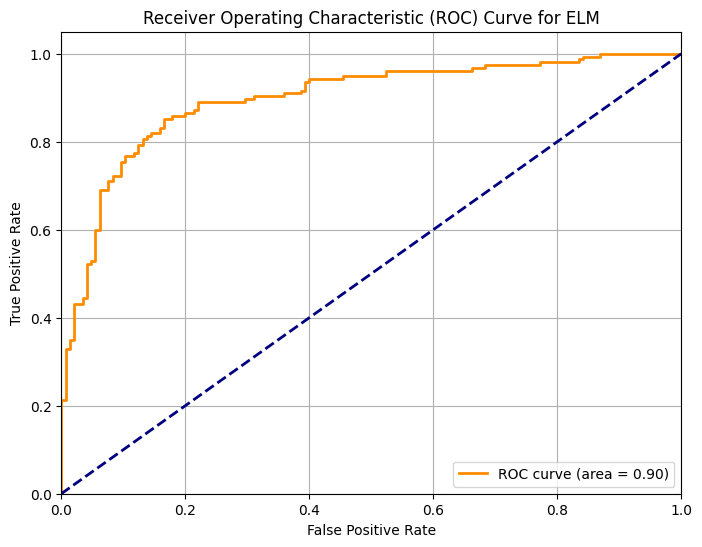

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
# No need to import train_test_split or make_classification if data is pre-loaded

class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(self.input_size, self.hidden_size)
        self.bias = np.random.randn(self.hidden_size)
        self.output_weights = None
        self.one_hot = False
        self.classes = None

    def _activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation

    def fit(self, X, y):
        # One-hot encode y if multi-class
        if len(np.unique(y)) > 2:
            self.one_hot = True
            self.classes = np.unique(y)
            y_onehot = np.zeros((y.shape[0], len(self.classes)))
            for i, label in enumerate(y):
                y_onehot[i, np.where(self.classes == label)[0][0]] = 1
            y = y_onehot
        else:
            self.one_hot = False
            y = np.array(y).reshape(-1, 1)

        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        self.output_weights = np.dot(np.linalg.pinv(H), y)

    def predict(self, X, return_probabilities=False): # Added return_probabilities parameter
        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        y_pred = np.dot(H, self.output_weights)
        if self.one_hot:
            if return_probabilities:
                # For multi-class, apply softmax to raw output for probabilities
                exp_y_pred = np.exp(y_pred - np.max(y_pred, axis=1, keepdims=True))
                return exp_y_pred / np.sum(exp_y_pred, axis=1, keepdims=True)
            else:
                return self.classes[np.argmax(y_pred, axis=1)]
        else:
            if return_probabilities:
                # For binary classification, apply sigmoid to convert scores to probabilities
                return 1 / (1 + np.exp(-y_pred)).flatten()
            else:
                return (y_pred > 0.5).astype(int).flatten()

elm = ELM(input_size=X_train.shape[1], hidden_size=100, output_size=1)
elm.fit(X_train, y_train)

y_pred_elm = elm.predict(X_test, return_probabilities=False)

y_pred_proba_elm = elm.predict(X_test, return_probabilities=True)

print("--- ELM Performance Metrics ---")

elm_accuracy = accuracy_score(y_test, y_pred_elm)
print(f"Accuracy: {elm_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_elm, zero_division=0))

cm = confusion_matrix(y_test, y_pred_elm)
# Ensure cm has exactly 2x2 shape for binary classification
if cm.shape == (2, 2):
    TN, FP, FN, TP = cm.ravel() # Flatten array to get values easily
else:
    # Handle cases where one class might not be predicted or present in y_test
    print("\nWarning: Confusion matrix is not 2x2. Cannot calculate Sensitivity/Specificity directly for binary case.")
    TN, FP, FN, TP = 0, 0, 0, 0 # Set to zero to prevent errors in calculations below

sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

print(f"Sensitivity (Recall of Positive Class): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")


# --- Plot ROC Curve ---
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_elm)
roc_auc = roc_auc_score(y_test, y_pred_proba_elm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ELM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# DTC

In [78]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree classifier with default params
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# 2. ELM (Baseline)
elm = ELM(input_size=X_train.shape[1], hidden_size=100, output_size=1)
elm.fit(X_train, y_train)
y_pred_elm = elm.predict(X_test)

# Evaluate
print("Decision Tree Accuracy (Baseline):", accuracy_score(y_test, y_pred_dt))
print("ELM Accuracy (Baseline):", accuracy_score(y_test, y_pred_elm))
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_elm))


Decision Tree Accuracy (Baseline): 0.8566666666666667
ELM Accuracy (Baseline): 0.8266666666666667
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       145
           1       0.86      0.86      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       145
           1       0.86      0.79      0.83       155

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



Decision Tree Accuracy (Baseline): 0.8566666666666667
ELM Accuracy (Baseline): 0.8266666666666667

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       145
           1       0.86      0.86      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300


ELM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       145
           1       0.87      0.78      0.82       155

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



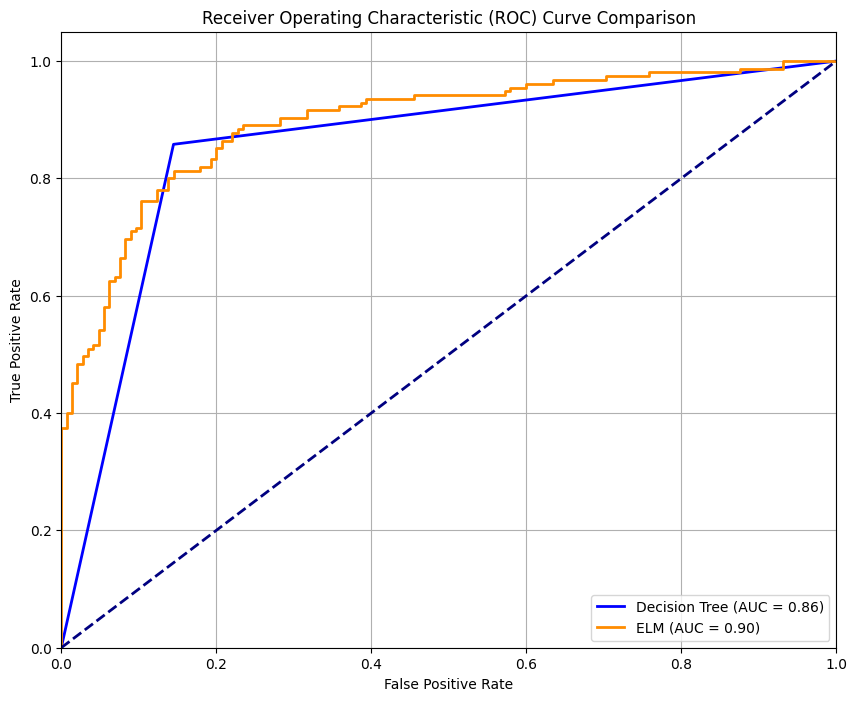

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create dummy data
from sklearn.tree import DecisionTreeClassifier

# Redefine the ELM class to return probabilities for binary classification
class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size # This is often 1 for binary classification internally
        self.input_weights = np.random.randn(self.input_size, self.hidden_size)
        self.bias = np.random.randn(self.hidden_size)
        self.output_weights = None
        self.one_hot = False
        self.classes = None

    def _activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation

    def fit(self, X, y):
        # One-hot encode y if multi-class
        if len(np.unique(y)) > 2:
            self.one_hot = True
            self.classes = np.unique(y)
            y_onehot = np.zeros((y.shape[0], len(self.classes)))
            for i, label in enumerate(y):
                y_onehot[i, np.where(self.classes == label)[0][0]] = 1
            y = y_onehot
        else:
            self.one_hot = False
            y = np.array(y).reshape(-1, 1)

        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        self.output_weights = np.dot(np.linalg.pinv(H), y)

    def predict(self, X, return_probabilities=False): # Added return_probabilities parameter
        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        y_pred = np.dot(H, self.output_weights)

        if self.one_hot:
            if return_probabilities:
                # For multi-class, apply softmax to raw output for probabilities
                exp_y_pred = np.exp(y_pred - np.max(y_pred, axis=1, keepdims=True))
                return exp_y_pred / np.sum(exp_y_pred, axis=1, keepdims=True)
            else:
                return self.classes[np.argmax(y_pred, axis=1)]
        else:
            if return_probabilities:
                # For binary classification, apply sigmoid to convert scores to probabilities
                return 1 / (1 + np.exp(-y_pred)).flatten()
            else:
                return (y_pred > 0.5).astype(int).flatten()

# --- Dummy Data Generation (if X_train, y_train, X_test, y_test are not defined in your environment) ---
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ---------------------------------------------------------------------------------------------------

# 1. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set for labels and probabilities
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# 2. ELM (Baseline)
elm = ELM(input_size=X_train.shape[1], hidden_size=100, output_size=1)
elm.fit(X_train, y_train)

# Predict on test set for labels and probabilities
y_pred_elm = elm.predict(X_test, return_probabilities=False)
y_pred_proba_elm = elm.predict(X_test, return_probabilities=True)


# Evaluate and print reports
print("Decision Tree Accuracy (Baseline):", accuracy_score(y_test, y_pred_dt))
print("ELM Accuracy (Baseline):", accuracy_score(y_test, y_pred_elm))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nELM Classification Report:")
print(classification_report(y_test, y_pred_elm))

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Calculate ROC curve and AUC for ELM
fpr_elm, tpr_elm, _ = roc_curve(y_test, y_pred_proba_elm)
roc_auc_elm = roc_auc_score(y_test, y_pred_proba_elm)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_elm, tpr_elm, color='darkorange', lw=2, label=f'ELM (AUC = {roc_auc_elm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

--- Decision Tree Metrics ---
Decision Tree Accuracy (Baseline): 0.8566666666666667

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       145
           1       0.86      0.86      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Decision Tree Sensitivity (Recall of Positive Class): 0.8581
Decision Tree Specificity (True Negative Rate): 0.8552


--- ELM Metrics ---
ELM Accuracy (Baseline): 0.8033333333333333

ELM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       145
           1       0.84      0.77      0.80       155

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300

ELM Sensitivit

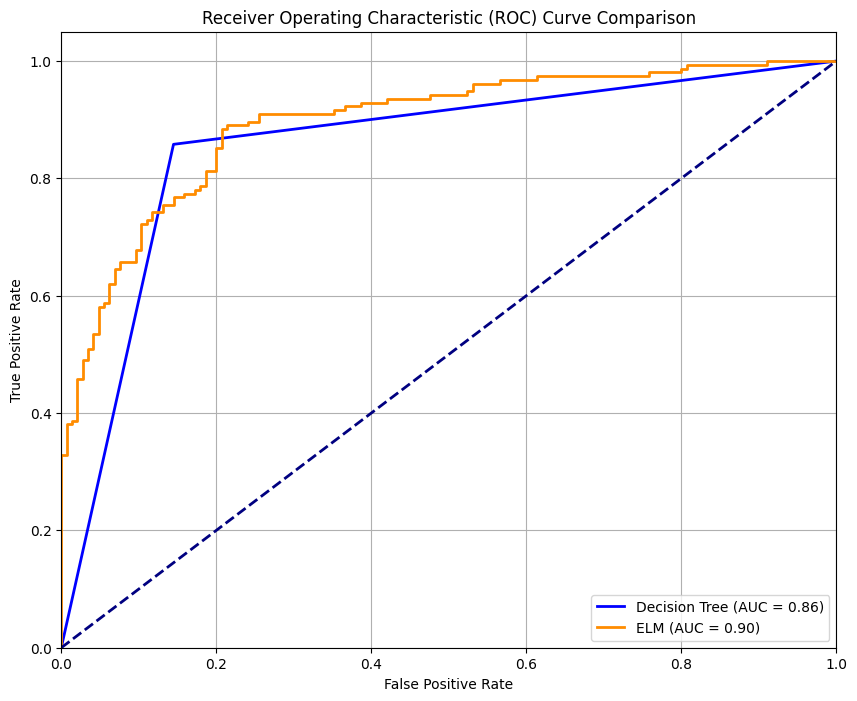

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create dummy data

# Redefine the ELM class to return probabilities for binary classification
class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size # This is often 1 for binary classification internally
        self.input_weights = np.random.randn(self.input_size, self.hidden_size)
        self.bias = np.random.randn(self.hidden_size)
        self.output_weights = None
        self.one_hot = False
        self.classes = None

    def _activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation

    def fit(self, X, y):
        # One-hot encode y if multi-class
        if len(np.unique(y)) > 2:
            self.one_hot = True
            self.classes = np.unique(y)
            y_onehot = np.zeros((y.shape[0], len(self.classes)))
            for i, label in enumerate(y):
                y_onehot[i, np.where(self.classes == label)[0][0]] = 1
            y = y_onehot
        else:
            self.one_hot = False
            y = np.array(y).reshape(-1, 1)

        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        self.output_weights = np.dot(np.linalg.pinv(H), y)

    def predict(self, X, return_probabilities=False): # Added return_probabilities parameter
        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        y_pred = np.dot(H, self.output_weights)

        if self.one_hot:
            if return_probabilities:
                # For multi-class, apply softmax to raw output for probabilities
                exp_y_pred = np.exp(y_pred - np.max(y_pred, axis=1, keepdims=True))
                return exp_y_pred / np.sum(exp_y_pred, axis=1, keepdims=True)
            else:
                return self.classes[np.argmax(y_pred, axis=1)]
        else:
            if return_probabilities:
                # For binary classification, apply sigmoid to convert scores to probabilities
                return 1 / (1 + np.exp(-y_pred)).flatten()
            else:
                return (y_pred > 0.5).astype(int).flatten()

# --- Dummy Data Generation (if X_train, y_train, X_test, y_test are not defined in your environment) ---
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ---------------------------------------------------------------------------------------------------

# 1. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set for labels and probabilities
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# 2. ELM (Baseline)
elm = ELM(input_size=X_train.shape[1], hidden_size=100, output_size=1)
elm.fit(X_train, y_train)

# Predict on test set for labels and probabilities
y_pred_elm = elm.predict(X_test, return_probabilities=False)
y_pred_proba_elm = elm.predict(X_test, return_probabilities=True)


# --- Evaluate and print metrics for Decision Tree ---
print("--- Decision Tree Metrics ---")
print("Decision Tree Accuracy (Baseline):", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

# Calculate Sensitivity and Specificity for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
TN_dt, FP_dt, FN_dt, TP_dt = cm_dt.ravel()
sensitivity_dt = TP_dt / (TP_dt + FN_dt) if (TP_dt + FN_dt) != 0 else 0
specificity_dt = TN_dt / (TN_dt + FP_dt) if (TN_dt + FP_dt) != 0 else 0
print(f"Decision Tree Sensitivity (Recall of Positive Class): {sensitivity_dt:.4f}")
print(f"Decision Tree Specificity (True Negative Rate): {specificity_dt:.4f}")

print("\n" + "="*40 + "\n") # Separator

# --- Evaluate and print metrics for ELM ---
print("--- ELM Metrics ---")
print("ELM Accuracy (Baseline):", accuracy_score(y_test, y_pred_elm))
print("\nELM Classification Report:")
print(classification_report(y_test, y_pred_elm, zero_division=0))

# Calculate Sensitivity and Specificity for ELM
cm_elm = confusion_matrix(y_test, y_pred_elm)
TN_elm, FP_elm, FN_elm, TP_elm = cm_elm.ravel()
sensitivity_elm = TP_elm / (TP_elm + FN_elm) if (TP_elm + FN_elm) != 0 else 0
specificity_elm = TN_elm / (TN_elm + FP_elm) if (TN_elm + FP_elm) != 0 else 0
print(f"ELM Sensitivity (Recall of Positive Class): {sensitivity_elm:.4f}")
print(f"ELM Specificity (True Negative Rate): {specificity_elm:.4f}")

print("\n" + "="*40 + "\n") # Separator


# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Calculate ROC curve and AUC for ELM
fpr_elm, tpr_elm, _ = roc_curve(y_test, y_pred_proba_elm)
roc_auc_elm = roc_auc_score(y_test, y_pred_proba_elm)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_elm, tpr_elm, color='darkorange', lw=2, label=f'ELM (AUC = {roc_auc_elm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [58]:
from sklearn.model_selection import cross_val_score

def dt_objective(params):
    max_depth, min_samples_split = params
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)

    dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    # Return negative accuracy as we minimize
    return -scores.mean()


Best HBA Parameters (max_depth, min_samples_split): [ 5 18]
HBA-Optimized Decision Tree Accuracy: 0.8833333333333333


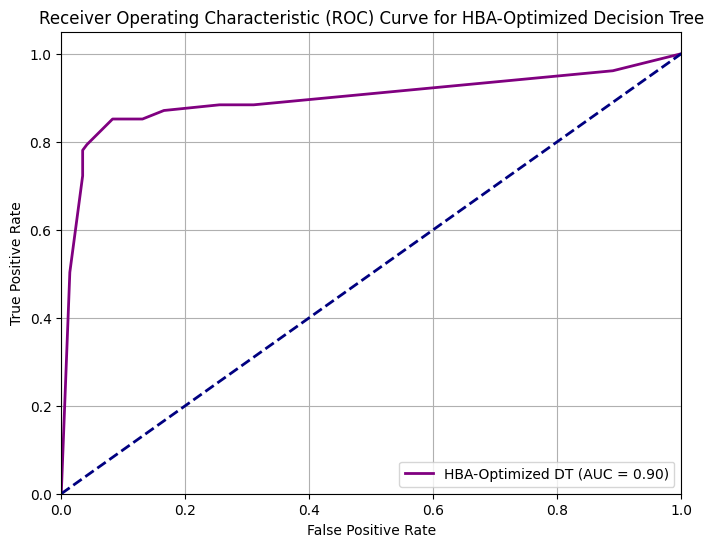

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # For dummy data

# --- Dummy Data Generation (if X_train, y_train, X_test, y_test are not defined) ---
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ----------------------------------------------------------------------------------

def fitness_function_hba(params, X_train, y_train, X_val, y_val):
    # Ensure params are integers for DecisionTreeClassifier
    max_depth = int(params[0])
    min_samples_split = int(params[1])

    # Ensure parameters are within valid ranges for DecisionTreeClassifier
    if max_depth < 1: max_depth = 1
    if min_samples_split < 2: min_samples_split = 2

    # Initialize Decision Tree Classifier with the given parameters
    # Added random_state for reproducibility
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    # The fitness is 1 - accuracy, so a lower value is better
    return 1 - accuracy_score(y_val, y_pred)

def honey_badger_algorithm(X_train, y_train, X_val, y_val, n_agents=10, max_iter=20):
    dim = 2 # max_depth and min_samples_split
    # Define bounds for the parameters
    # max_depth: 1 to 20
    # min_samples_split: 2 to 20
    lb = np.array([1, 2])
    ub = np.array([20, 20])

    # Initialize agents' positions randomly within bounds (as floats)
    agents = np.random.uniform(low=lb, high=ub, size=(n_agents, dim))

    best_fitness = float("inf")
    best_position = None # This will store the continuous best position

    for iter_num in range(max_iter):
        # Update alpha (exploration/exploitation parameter)
        alpha = 2 * np.exp(-4 * (iter_num / max_iter) ** 2)

        # Evaluate fitness for each agent and find the current best
        for i in range(n_agents):
            # Pass integer parameters to the fitness function for model training
            current_params_int = agents[i].astype(int)
            fitness = fitness_function_hba(current_params_int, X_train, y_train, X_val, y_val)

            if fitness < best_fitness:
                best_fitness = fitness
                best_position = agents[i].copy() # Store the best position (float)

        # Update agents' positions
        for i in range(n_agents):
            F = alpha * np.random.rand() # Force factor

            # Select a random agent from the population for movement inspiration
            rand_agent_idx = np.random.randint(n_agents)
            while rand_agent_idx == i: # Ensure it's not the same agent
                rand_agent_idx = np.random.randint(n_agents)
            rand_agent = agents[rand_agent_idx]

            # Movement strategy (simplified from original HBA, focusing on core idea)
            if np.random.rand() < 0.5: # Exploration tendency
                agents[i] += F * (rand_agent - agents[i])
            else: # Exploitation tendency (move towards best_position)
                # Adding a small random component to avoid getting stuck
                agents[i] += F * (best_position - agents[i]) + np.random.randn(dim) * (ub - lb) * 0.01

            # Clamp agent positions within the defined bounds
            agents[i] = np.clip(agents[i], lb, ub)

    # Return the best position found, converted to integers for final model
    return best_position.astype(int)

# --- Main execution part ---

# Train-validation split from the full training data
# Note: X_train, y_train used here are the original 'training' set.
# X_sub_train and X_val are derived from this.
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Run HBA optimizer to find the best hyperparameters
best_params_hba = honey_badger_algorithm(X_sub_train, y_sub_train, X_val, y_val)
print("Best HBA Parameters (max_depth, min_samples_split):", best_params_hba)

# Train the final Decision Tree model using the best parameters found by HBA
# Use the full original X_train, y_train to train the final model
clf_hba = DecisionTreeClassifier(max_depth=best_params_hba[0], min_samples_split=best_params_hba[1], random_state=42)
clf_hba.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_hba = clf_hba.predict(X_test)

# Calculate and print accuracy
hba_accuracy = accuracy_score(y_test, y_pred_hba)
print("HBA-Optimized Decision Tree Accuracy:", hba_accuracy)

# Get prediction probabilities for the positive class (needed for ROC curve)
y_pred_proba_hba = clf_hba.predict_proba(X_test)[:, 1]

# Calculate ROC curve points (False Positive Rate, True Positive Rate)
fpr_hba, tpr_hba, thresholds_hba = roc_curve(y_test, y_pred_proba_hba)

# Calculate Area Under the ROC Curve (AUC)
roc_auc_hba = roc_auc_score(y_test, y_pred_proba_hba)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_hba, tpr_hba, color='purple', lw=2, label=f'HBA-Optimized DT (AUC = {roc_auc_hba:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HBA-Optimized Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# DTC HBA


In [36]:
best_max_depth = int(best_params_hba[0])
best_min_samples_split = int(best_params_hba[1])

dt_hba = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
dt_hba.fit(X_train, y_train)

y_pred_hba = dt_hba.predict(X_test)

print("Optimized Decision Tree Accuracy (HBA):", accuracy_score(y_test, y_pred_hba))
print(classification_report(y_test, y_pred_hba))


Optimized Decision Tree Accuracy (HBA): 0.8833333333333333
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       145
           1       0.92      0.85      0.88       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



Best HBA Parameters (max_depth, min_samples_split): [ 5 19]
Optimized Decision Tree Accuracy (HBA): 0.8833333333333333

Classification Report (HBA-Optimized DT):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       145
           1       0.92      0.85      0.88       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



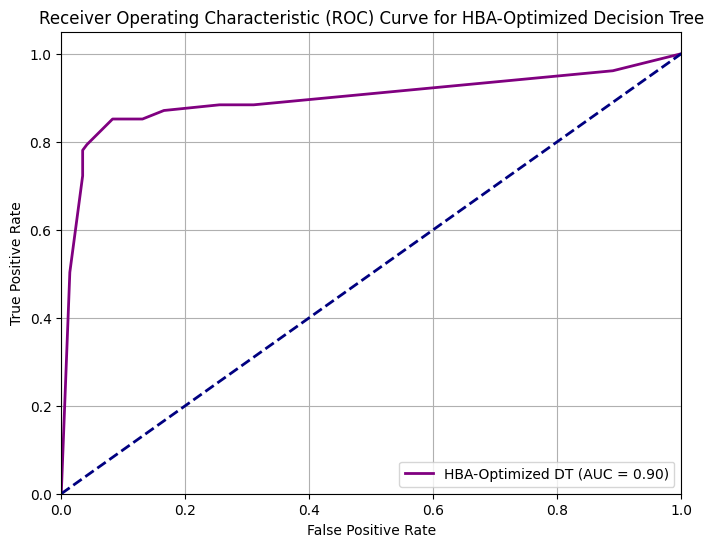

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # For dummy data

# --- Dummy Data Generation (if X_train, y_train, X_test, y_test are not defined) ---
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ----------------------------------------------------------------------------------

# --- Honey Badger Algorithm (HBA) and fitness function (as provided previously) ---
def fitness_function_hba(params, X_train, y_train, X_val, y_val):
    max_depth = int(params[0])
    min_samples_split = int(params[1])

    if max_depth < 1: max_depth = 1
    if min_samples_split < 2: min_samples_split = 2

    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    return 1 - accuracy_score(y_val, y_pred)  # Lower is better

def honey_badger_algorithm(X_train, y_train, X_val, y_val, n_agents=10, max_iter=20):
    dim = 2
    lb = np.array([1, 2])
    ub = np.array([20, 20])

    agents = np.random.uniform(low=lb, high=ub, size=(n_agents, dim))
    best_fitness = float("inf")
    best_position = None

    for iter_num in range(max_iter):
        alpha = 2 * np.exp(-4 * (iter_num / max_iter) ** 2)
        for i in range(n_agents):
            current_params_int = agents[i].astype(int)
            fitness = fitness_function_hba(current_params_int, X_train, y_train, X_val, y_val)
            if fitness < best_fitness:
                best_fitness = fitness
                best_position = agents[i].copy()

        for i in range(n_agents):
            F = alpha * np.random.rand()
            rand_agent_idx = np.random.randint(n_agents)
            while rand_agent_idx == i:
                rand_agent_idx = np.random.randint(n_agents)
            rand_agent = agents[rand_agent_idx]

            if np.random.rand() < 0.5:
                agents[i] += F * (rand_agent - agents[i])
            else:
                agents[i] += F * (best_position - agents[i]) + np.random.randn(dim) * (ub - lb) * 0.01

            agents[i] = np.clip(agents[i], lb, ub)

    return best_position.astype(int)
# ----------------------------------------------------------------------------------

# Split the training data further into sub_train and validation sets for HBA
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Run HBA optimizer to find the best hyperparameters
best_params_hba = honey_badger_algorithm(X_sub_train, y_sub_train, X_val, y_val)
print("Best HBA Parameters (max_depth, min_samples_split):", best_params_hba)

# Train the final Decision Tree using the best parameters found by HBA
best_max_depth = int(best_params_hba[0])
best_min_samples_split = int(best_params_hba[1])

dt_hba = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
dt_hba.fit(X_train, y_train) # Train on the full X_train

# Predict class labels on the test set
y_pred_hba = dt_hba.predict(X_test)

# Print accuracy and classification report
print("Optimized Decision Tree Accuracy (HBA):", accuracy_score(y_test, y_pred_hba))
print("\nClassification Report (HBA-Optimized DT):")
print(classification_report(y_test, y_pred_hba))

# Get prediction probabilities for the positive class (needed for ROC curve)
# dt_hba.predict_proba() returns probabilities for [class 0, class 1], we need class 1
y_pred_proba_hba = dt_hba.predict_proba(X_test)[:, 1]

# Calculate ROC curve points (False Positive Rate, True Positive Rate)
fpr_hba, tpr_hba, thresholds_hba = roc_curve(y_test, y_pred_proba_hba)

# Calculate Area Under the ROC Curve (AUC)
roc_auc_hba = roc_auc_score(y_test, y_pred_proba_hba)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_hba, tpr_hba, color='purple', lw=2, label=f'HBA-Optimized DT (AUC = {roc_auc_hba:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HBA-Optimized Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Best HBA Parameters (max_depth, min_samples_split): [ 5 16]

--- HBA-Optimized Decision Tree Metrics ---
Optimized Decision Tree Accuracy (HBA): 0.8833

Classification Report (HBA-Optimized DT):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       145
           1       0.92      0.85      0.88       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300

Sensitivity (Recall of Positive Class): 0.8516
Specificity (True Negative Rate): 0.9172


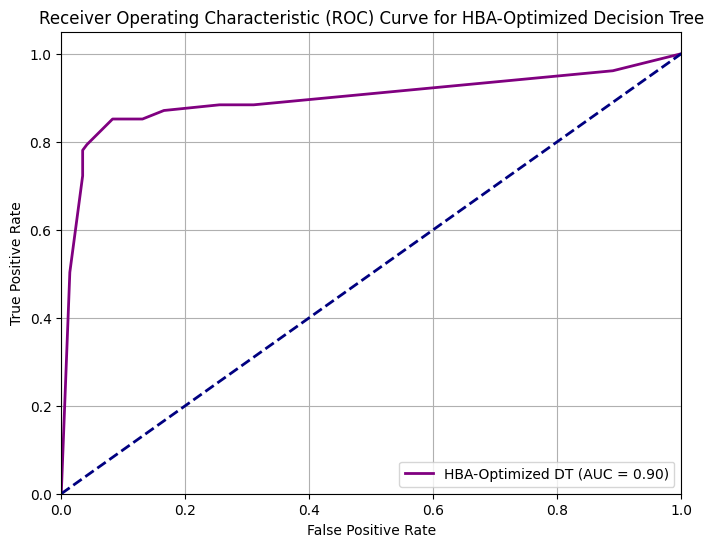

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification # For dummy data

# --- Dummy Data Generation (if X_train, y_train, X_test, y_test are not defined) ---
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ----------------------------------------------------------------------------------

# Objective function for cross-validation (not directly used by HBA in this snippet, but kept for context)
def dt_objective(params):
    max_depth, min_samples_split = params
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)

    # Ensure parameters are valid
    if max_depth < 1: max_depth = 1
    if min_samples_split < 2: min_samples_split = 2

    dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    # Return negative accuracy as we minimize
    return -scores.mean()

def fitness_function_hba(params, X_train, y_train, X_val, y_val):
    # Ensure params are integers for DecisionTreeClassifier
    max_depth = int(params[0])
    min_samples_split = int(params[1])

    # Ensure parameters are within valid ranges for DecisionTreeClassifier
    if max_depth < 1: max_depth = 1
    if min_samples_split < 2: min_samples_split = 2

    # Initialize Decision Tree Classifier with the given parameters
    # Added random_state for reproducibility
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    # The fitness is 1 - accuracy, so a lower value is better
    return 1 - accuracy_score(y_val, y_pred)

def honey_badger_algorithm(X_train, y_train, X_val, y_val, n_agents=10, max_iter=20):
    dim = 2 # max_depth and min_samples_split
    # Define bounds for the parameters
    # max_depth: 1 to 20
    # min_samples_split: 2 to 20
    lb = np.array([1, 2])
    ub = np.array([20, 20])

    # Initialize agents' positions randomly within bounds (as floats)
    agents = np.random.uniform(low=lb, high=ub, size=(n_agents, dim))

    best_fitness = float("inf")
    best_position = None # This will store the continuous best position

    for iter_num in range(max_iter):
        # Update alpha (exploration/exploitation parameter)
        alpha = 2 * np.exp(-4 * (iter_num / max_iter) ** 2)

        # Evaluate fitness for each agent and find the current best
        for i in range(n_agents):
            # Pass integer parameters to the fitness function for model training
            current_params_int = agents[i].astype(int)
            fitness = fitness_function_hba(current_params_int, X_train, y_train, X_val, y_val)

            if fitness < best_fitness:
                best_fitness = fitness
                best_position = agents[i].copy() # Store the best position (float)

        # Update agents' positions
        for i in range(n_agents):
            F = alpha * np.random.rand() # Force factor

            # Select a random agent from the population for movement inspiration
            rand_agent_idx = np.random.randint(n_agents)
            while rand_agent_idx == i: # Ensure it's not the same agent
                rand_agent_idx = np.random.randint(n_agents)
            rand_agent = agents[rand_agent_idx]

            # Movement strategy (simplified from original HBA, focusing on core idea)
            if np.random.rand() < 0.5: # Exploration tendency
                agents[i] += F * (rand_agent - agents[i])
            else: # Exploitation tendency (move towards best_position)
                # Adding a small random component to avoid getting stuck
                agents[i] += F * (best_position - agents[i]) + np.random.randn(dim) * (ub - lb) * 0.01

            # Clamp agent positions within the defined bounds
            agents[i] = np.clip(agents[i], lb, ub)

    # Return the best position found, converted to integers for final model
    return best_position.astype(int)

# --- Main execution part ---

# Train-validation split from the full training data
# Note: X_train, y_train used here are the original 'training' set.
# X_sub_train and X_val are derived from this.
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Run HBA optimizer to find the best hyperparameters
best_params_hba = honey_badger_algorithm(X_sub_train, y_sub_train, X_val, y_val)
print("Best HBA Parameters (max_depth, min_samples_split):", best_params_hba)

# Train the final Decision Tree model using the best parameters found by HBA
# Use the full original X_train, y_train to train the final model
best_max_depth = int(best_params_hba[0])
best_min_samples_split = int(best_params_hba[1])

dt_hba = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
dt_hba.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_hba = dt_hba.predict(X_test)

# --- Calculate and print metrics for HBA-Optimized Decision Tree ---
print("\n--- HBA-Optimized Decision Tree Metrics ---")

# 1. Accuracy
hba_accuracy = accuracy_score(y_test, y_pred_hba)
print(f"Optimized Decision Tree Accuracy (HBA): {hba_accuracy:.4f}")

# 2. Precision, Recall, F1-score (using classification_report)
print("\nClassification Report (HBA-Optimized DT):")
print(classification_report(y_test, y_pred_hba, zero_division=0))

# 3. Sensitivity (True Positive Rate/Recall of positive class) and Specificity (True Negative Rate)
# Get Confusion Matrix: TN, FP, FN, TP
# For binary classification (0, 1), confusion_matrix output is usually:
# [[TN, FP],
#  [FN, TP]]
cm_hba = confusion_matrix(y_test, y_pred_hba)
TN_hba, FP_hba, FN_hba, TP_hba = cm_hba.ravel() # Flatten array to get values easily

sensitivity_hba = TP_hba / (TP_hba + FN_hba) if (TP_hba + FN_hba) != 0 else 0
specificity_hba = TN_hba / (TN_hba + FP_hba) if (TN_hba + FP_hba) != 0 else 0

print(f"Sensitivity (Recall of Positive Class): {sensitivity_hba:.4f}")
print(f"Specificity (True Negative Rate): {specificity_hba:.4f}")

# --- Plotting the ROC curve ---
# Get prediction probabilities for the positive class (needed for ROC curve)
y_pred_proba_hba = dt_hba.predict_proba(X_test)[:, 1]

# Calculate ROC curve points (False Positive Rate, True Positive Rate)
fpr_hba, tpr_hba, thresholds_hba = roc_curve(y_test, y_pred_proba_hba)

# Calculate Area Under the ROC Curve (AUC)
roc_auc_hba = roc_auc_score(y_test, y_pred_proba_hba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_hba, tpr_hba, color='purple', lw=2, label=f'HBA-Optimized DT (AUC = {roc_auc_hba:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HBA-Optimized Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SSA DTC

Best SSA Parameters (max_depth, min_samples_split): [ 5 15]
SSA-Optimized Decision Tree Accuracy: 0.8833333333333333

Classification Report (SSA-Optimized DT):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       145
           1       0.92      0.85      0.88       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



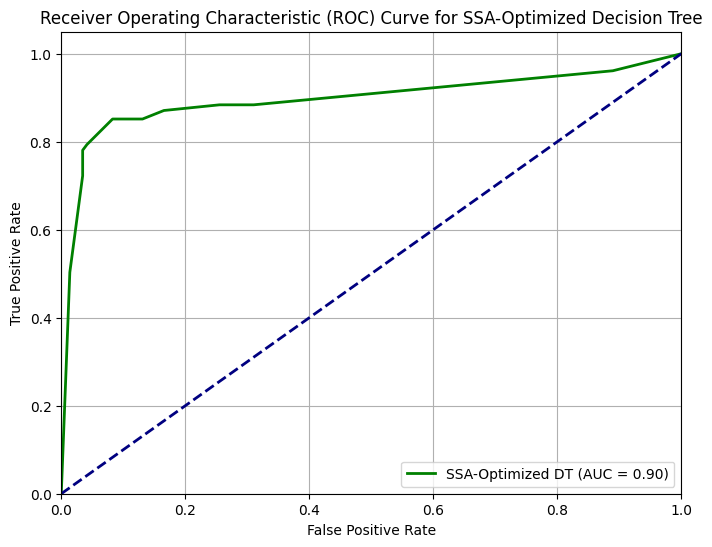

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # Used for generating dummy data

# --- Dummy Data Generation (if X_train, y_train, X_test, y_test are not defined) ---
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ----------------------------------------------------------------------------------

def fitness_function_ssa(params, X_train, y_train, X_val, y_val):
    # Ensure parameters are integers for DecisionTreeClassifier
    max_depth = int(params[0])
    min_samples_split = int(params[1])

    # Ensure parameters are within valid ranges
    if max_depth < 1: max_depth = 1
    if min_samples_split < 2: min_samples_split = 2

    # Initialize Decision Tree Classifier
    # Added random_state for reproducibility
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    # The fitness is 1 - accuracy, so a lower value is better (minimization problem)
    return 1 - accuracy_score(y_val, y_pred)

def salp_swarm_algorithm(X_train, y_train, X_val, y_val, n_salps=10, max_iter=20):
    dim = 2 # max_depth and min_samples_split
    # Define bounds for the parameters
    # max_depth: 1 to 20
    # min_samples_split: 2 to 20
    lb = np.array([1, 2])
    ub = np.array([20, 20])

    # Initialize salps' positions randomly within bounds (as floats)
    # Using uniform to allow for non-integer initial positions which can be clipped later
    salps = np.random.uniform(low=lb, high=ub, size=(n_salps, dim))

    food_position = None
    food_fitness = float("inf") # Best fitness found so far

    for iter_num in range(max_iter):
        # Convergence factor c1 (decreases from 2 to 0 over iterations)
        c1 = 2 * np.exp(-(4 * iter_num / max_iter) ** 2)

        # Evaluate fitness for all salps and update food_position
        for i in range(n_salps):
            # Convert salp positions to integers for the fitness function
            current_params_int = salps[i].astype(int)
            fitness = fitness_function_ssa(current_params_int, X_train, y_train, X_val, y_val)

            if fitness < food_fitness:
                food_fitness = fitness
                food_position = salps[i].copy() # Store the best position (float)

        # Update positions of salps
        for i in range(n_salps):
            for j in range(dim): # Iterate over each dimension (parameter)
                if i == 0:  # Leader salp
                    c2 = np.random.rand() # Random number [0, 1]
                    c3 = np.random.rand() # Random number [0, 1]

                    if c3 < 0.5:
                        salps[i, j] = food_position[j] + c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                    else:
                        salps[i, j] = food_position[j] - c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                else:  # Follower salps
                    # Follow the salp directly in front of them
                    salps[i, j] = (salps[i, j] + salps[i - 1, j]) / 2.0

            # Clamp salp positions within the defined bounds after update
            salps[i] = np.clip(salps[i], lb, ub)

    # Return the best position found (food_position), converted to integers
    return food_position.astype(int)

# --- Main execution part ---

# Train-validation split from the full training data for SSA optimization
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Run SSA optimizer to find the best hyperparameters
best_params_ssa = salp_swarm_algorithm(X_sub_train, y_sub_train, X_val, y_val)
print("Best SSA Parameters (max_depth, min_samples_split):", best_params_ssa)

# Train the final Decision Tree model using the best parameters found by SSA
# Use the full original X_train, y_train to train this final model
clf_ssa = DecisionTreeClassifier(max_depth=best_params_ssa[0], min_samples_split=best_params_ssa[1], random_state=42)
clf_ssa.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_ssa = clf_ssa.predict(X_test)

# Calculate and print accuracy and classification report
ssa_accuracy = accuracy_score(y_test, y_pred_ssa)
print("SSA-Optimized Decision Tree Accuracy:", ssa_accuracy)
print("\nClassification Report (SSA-Optimized DT):")
print(classification_report(y_test, y_pred_ssa))

# Get prediction probabilities for the positive class (needed for ROC curve)
# clf_ssa.predict_proba() returns probabilities for [class 0, class 1], we need class 1
y_pred_proba_ssa = clf_ssa.predict_proba(X_test)[:, 1]

# Calculate ROC curve points (False Positive Rate, True Positive Rate)
fpr_ssa, tpr_ssa, thresholds_ssa = roc_curve(y_test, y_pred_proba_ssa)

# Calculate Area Under the ROC Curve (AUC)
roc_auc_ssa = roc_auc_score(y_test, y_pred_proba_ssa)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ssa, tpr_ssa, color='green', lw=2, label=f'SSA-Optimized DT (AUC = {roc_auc_ssa:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SSA-Optimized Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Best SSA Parameters (max_depth, min_samples_split): [ 5 13]

--- SSA-Optimized Decision Tree Metrics ---
SSA-Optimized Decision Tree Accuracy: 0.8833

Classification Report (SSA-Optimized DT):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       145
           1       0.92      0.85      0.88       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300

Sensitivity (Recall of Positive Class): 0.8516
Specificity (True Negative Rate): 0.9172


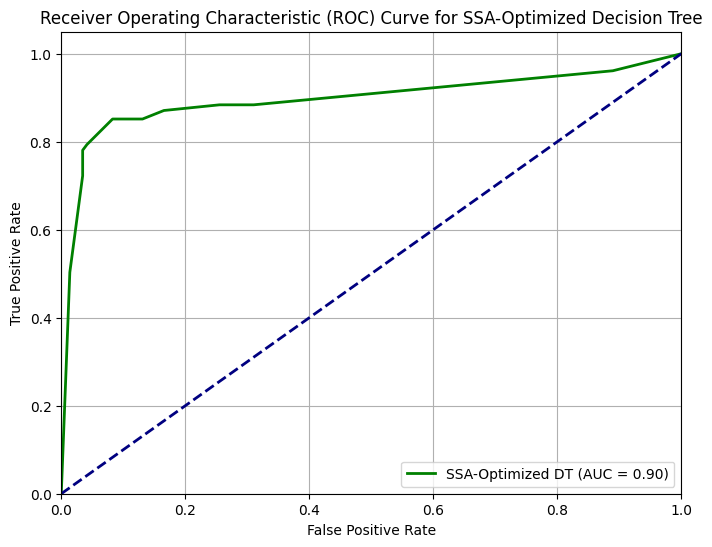

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # Used for generating dummy data

# --- Dummy Data Generation (if X_train, y_train, X_test, y_test are not defined) ---
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ----------------------------------------------------------------------------------

def fitness_function_ssa(params, X_train, y_train, X_val, y_val):
    # Ensure parameters are integers for DecisionTreeClassifier
    max_depth = int(params[0])
    min_samples_split = int(params[1])

    # Ensure parameters are within valid ranges
    if max_depth < 1: max_depth = 1
    if min_samples_split < 2: min_samples_split = 2

    # Initialize Decision Tree Classifier
    # Added random_state for reproducibility
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    # The fitness is 1 - accuracy, so a lower value is better (minimization problem)
    return 1 - accuracy_score(y_val, y_pred)

def salp_swarm_algorithm(X_train, y_train, X_val, y_val, n_salps=10, max_iter=20):
    dim = 2 # max_depth and min_samples_split
    # Define bounds for the parameters
    # max_depth: 1 to 20
    # min_samples_split: 2 to 20
    lb = np.array([1, 2])
    ub = np.array([20, 20])

    # Initialize salps' positions randomly within bounds (as floats)
    # Using uniform to allow for non-integer initial positions which can be clipped later
    salps = np.random.uniform(low=lb, high=ub, size=(n_salps, dim))

    food_position = None
    food_fitness = float("inf") # Best fitness found so far

    for iter_num in range(max_iter):
        # Convergence factor c1 (decreases from 2 to 0 over iterations)
        c1 = 2 * np.exp(-(4 * iter_num / max_iter) ** 2)

        # Evaluate fitness for all salps and update food_position
        for i in range(n_salps):
            # Convert salp positions to integers for the fitness function
            current_params_int = salps[i].astype(int)
            fitness = fitness_function_ssa(current_params_int, X_train, y_train, X_val, y_val)

            if fitness < food_fitness:
                food_fitness = fitness
                food_position = salps[i].copy() # Store the best position (float)

        # Update positions of salps
        for i in range(n_salps):
            for j in range(dim): # Iterate over each dimension (parameter)
                if i == 0:  # Leader salp
                    c2 = np.random.rand() # Random number [0, 1]
                    c3 = np.random.rand() # Random number [0, 1]

                    if c3 < 0.5:
                        salps[i, j] = food_position[j] + c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                    else:
                        salps[i, j] = food_position[j] - c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                else:  # Follower salps
                    # Follow the salp directly in front of them
                    salps[i, j] = (salps[i, j] + salps[i - 1, j]) / 2.0

            # Clamp salp positions within the defined bounds after update
            salps[i] = np.clip(salps[i], lb, ub)

    # Return the best position found (food_position), converted to integers
    return food_position.astype(int)

# --- Main execution part ---

# Train-validation split from the full training data for SSA optimization
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Run SSA optimizer to find the best hyperparameters
best_params_ssa = salp_swarm_algorithm(X_sub_train, y_sub_train, X_val, y_val)
print("Best SSA Parameters (max_depth, min_samples_split):", best_params_ssa)

# Train the final Decision Tree model using the best parameters found by SSA
# Use the full original X_train, y_train to train this final model
clf_ssa = DecisionTreeClassifier(max_depth=best_params_ssa[0], min_samples_split=best_params_ssa[1], random_state=42)
clf_ssa.fit(X_train, y_train)

# Predict class labels on the test set
y_pred_ssa = clf_ssa.predict(X_test)

# --- Calculate and print metrics for SSA-Optimized Decision Tree ---
print("\n--- SSA-Optimized Decision Tree Metrics ---")

# 1. Accuracy
ssa_accuracy = accuracy_score(y_test, y_pred_ssa)
print(f"SSA-Optimized Decision Tree Accuracy: {ssa_accuracy:.4f}")

# 2. Precision, Recall, F1-score (using classification_report)
print("\nClassification Report (SSA-Optimized DT):")
print(classification_report(y_test, y_pred_ssa, zero_division=0)) # zero_division=0 handles cases where no true samples for a class

# 3. Sensitivity (True Positive Rate/Recall of positive class) and Specificity (True Negative Rate)
# Get Confusion Matrix: TN, FP, FN, TP
# For binary classification (0, 1), confusion_matrix output is usually:
# [[TN, FP],
#  [FN, TP]]
cm_ssa = confusion_matrix(y_test, y_pred_ssa)
TN_ssa, FP_ssa, FN_ssa, TP_ssa = cm_ssa.ravel() # Flatten array to get values easily

sensitivity_ssa = TP_ssa / (TP_ssa + FN_ssa) if (TP_ssa + FN_ssa) != 0 else 0
specificity_ssa = TN_ssa / (TN_ssa + FP_ssa) if (TN_ssa + FP_ssa) != 0 else 0

print(f"Sensitivity (Recall of Positive Class): {sensitivity_ssa:.4f}")
print(f"Specificity (True Negative Rate): {specificity_ssa:.4f}")


# --- Plotting the ROC curve ---
# Get prediction probabilities for the positive class (needed for ROC curve)
y_pred_proba_ssa = clf_ssa.predict_proba(X_test)[:, 1]

# Calculate ROC curve points (False Positive Rate, True Positive Rate)
fpr_ssa, tpr_ssa, thresholds_ssa = roc_curve(y_test, y_pred_proba_ssa)

# Calculate Area Under the ROC Curve (AUC)
roc_auc_ssa = roc_auc_score(y_test, y_pred_proba_ssa)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ssa, tpr_ssa, color='green', lw=2, label=f'SSA-Optimized DT (AUC = {roc_auc_ssa:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SSA-Optimized Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ELM HBA & ELM SSA

In [39]:
def fitness_function_elm(hidden_size, X_train, y_train, X_val, y_val):
    hidden_size = int(hidden_size[0])
    hidden_size = max(1, min(hidden_size, 500))
    elm = ELM(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1)
    elm.fit(X_train, y_train)
    y_pred = elm.predict(X_val)
    return 1 - accuracy_score(y_val, y_pred)

def honey_badger_elm(X_train, y_train, X_val, y_val, n_agents=10, max_iter=20):
    lb = np.array([10])
    ub = np.array([500])
    agents = np.random.randint(low=lb, high=ub + 1, size=(n_agents, 1)).astype(float)
    best_fitness = float("inf")
    best_position = None
    for iter in range(max_iter):
        alpha = 2 * np.exp(-4 * (iter / max_iter) ** 2)
        for i in range(n_agents):
            fitness = fitness_function_elm(agents[i], X_train, y_train, X_val, y_val)
            if fitness < best_fitness:
                best_fitness = fitness
                best_position = agents[i].copy()
        for i in range(n_agents):
            F = alpha * np.random.rand()
            rand_agent = agents[np.random.randint(n_agents)]
            if np.random.rand() < 0.5:
                agents[i] += F * (rand_agent - agents[i])
            else:
                agents[i] -= F * (rand_agent - agents[i])
            agents[i] = np.clip(agents[i], lb, ub)
    return int(best_position[0])

    # ELM-HBA
best_hidden_hba = honey_badger_elm(X_sub_train, y_sub_train, X_val, y_val)
elm_hba = ELM(input_size=X_train.shape[1], hidden_size=best_hidden_hba, output_size=1)
elm_hba.fit(X_train, y_train)
y_pred_elm_hba = elm_hba.predict(X_test)
elm_hba_acc = accuracy_score(y_test, y_pred_elm_hba)
print("Optimized ELM  (HBA):", accuracy_score(y_test, y_pred_elm_hba))
print(classification_report(y_test, y_pred_elm_hba))

def salp_swarm_elm(X_train, y_train, X_val, y_val, n_salps=10, max_iter=20):
    lb = np.array([10])
    ub = np.array([500])
    salps = np.random.randint(lb[0], ub[0] + 1, size=(n_salps, 1)).astype(float)
    food_position = None
    food_fitness = float("inf")
    for iter in range(max_iter):
        c1 = 2 * np.exp(-(4 * iter / max_iter) ** 2)
        for i in range(n_salps):
            fitness = fitness_function_elm(salps[i], X_train, y_train, X_val, y_val)
            if fitness < food_fitness:
                food_fitness = fitness
                food_position = salps[i].copy()
        for i in range(n_salps):
            for j in range(1):
                if i == 0:
                    c2 = np.random.rand()
                    c3 = np.random.rand()
                    if c3 < 0.5:
                        salps[i, j] = food_position[j] + c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                    else:
                        salps[i, j] = food_position[j] - c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                else:
                    salps[i, j] = (salps[i, j] + salps[i - 1, j]) / 2.0
            salps[i] = np.clip(salps[i], lb, ub)
    return int(food_position[0])

    # ELM-SSA
best_hidden_ssa = salp_swarm_elm(X_sub_train, y_sub_train, X_val, y_val)
elm_ssa = ELM(input_size=X_train.shape[1], hidden_size=best_hidden_ssa, output_size=1)
elm_ssa.fit(X_train, y_train)
y_pred_elm_ssa = elm_ssa.predict(X_test)
elm_ssa_acc = accuracy_score(y_test, y_pred_elm_ssa)
print("Optimized ELM (SSA):", accuracy_score(y_test, y_pred_elm_ssa))
print(classification_report(y_test, y_pred_elm_ssa))



Optimized ELM  (HBA): 0.8366666666666667
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       145
           1       0.86      0.82      0.84       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

Optimized ELM (SSA): 0.8166666666666667
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       145
           1       0.85      0.78      0.81       155

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



Starting ELM Optimization with HBA and SSA...
HBA-Optimized Best Hidden Size: 84
Optimized ELM Accuracy (HBA): 0.83
Classification Report (ELM-HBA):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       145
           1       0.85      0.81      0.83       155

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

SSA-Optimized Best Hidden Size: 125
Optimized ELM Accuracy (SSA): 0.83
Classification Report (ELM-SSA):
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       145
           1       0.85      0.82      0.83       155

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



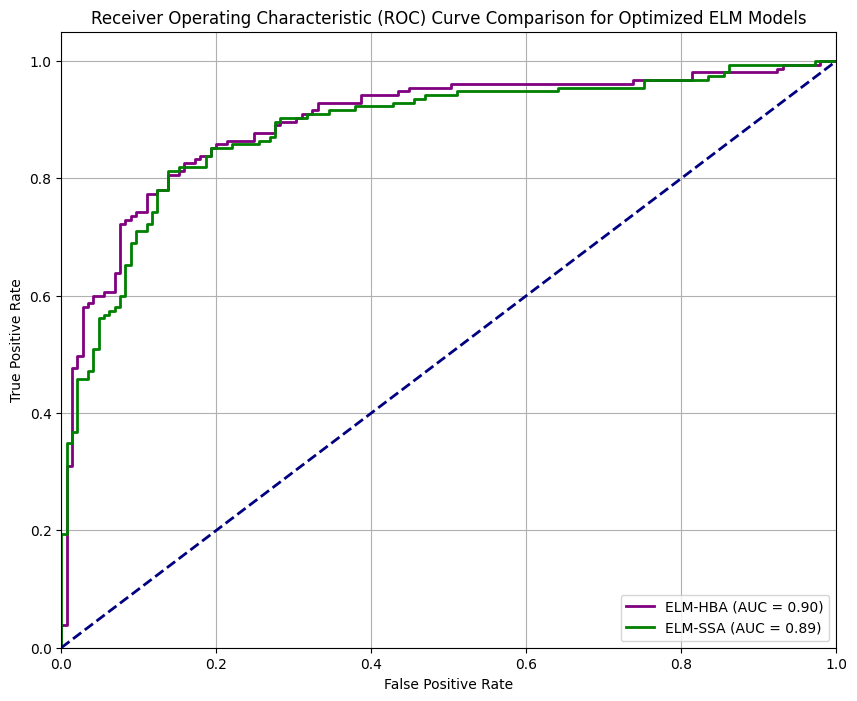

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # Used for generating dummy data

# --- ELM Class Definition (updated to return probabilities) ---
class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(self.input_size, self.hidden_size)
        self.bias = np.random.randn(self.hidden_size)
        self.output_weights = None
        self.one_hot = False
        self.classes = None

    def _activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation

    def fit(self, X, y):
        # One-hot encode y if multi-class (though this example focuses on binary)
        if len(np.unique(y)) > 2:
            self.one_hot = True
            self.classes = np.unique(y)
            y_onehot = np.zeros((y.shape[0], len(self.classes)))
            for i, label in enumerate(y):
                y_onehot[i, np.where(self.classes == label)[0][0]] = 1
            y = y_onehot
        else:
            self.one_hot = False
            y = np.array(y).reshape(-1, 1)

        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        self.output_weights = np.dot(np.linalg.pinv(H), y)

    def predict(self, X, return_probabilities=False): # Added return_probabilities
        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        y_pred = np.dot(H, self.output_weights)

        if self.one_hot:
            if return_probabilities:
                # For multi-class, return raw scores or apply softmax if true probabilities are needed
                exp_y_pred = np.exp(y_pred - np.max(y_pred, axis=1, keepdims=True))
                return exp_y_pred / np.sum(exp_y_pred, axis=1, keepdims=True)
            else:
                return self.classes[np.argmax(y_pred, axis=1)]
        else:
            if return_probabilities:
                # For binary classification, apply sigmoid to convert scores to probabilities
                return 1 / (1 + np.exp(-y_pred)).flatten()
            else:
                return (y_pred > 0.5).astype(int).flatten()

# --- Dummy Data Generation ---
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split X_train for validation set used by optimizers
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# -----------------------------

# --- Fitness Function for ELM ---
def fitness_function_elm(hidden_size_param, X_train, y_train, X_val, y_val):
    # Ensure hidden_size is an integer and within bounds
    hidden_size = int(hidden_size_param[0]) # hidden_size_param is expected as a 1-element array
    hidden_size = max(1, min(hidden_size, 500)) # Clamping for safety, although clip in HBA/SSA should handle

    elm = ELM(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1)
    elm.fit(X_train, y_train)
    # Use elm.predict to get hard labels for fitness calculation (accuracy)
    y_pred = elm.predict(X_val, return_probabilities=False)
    return 1 - accuracy_score(y_val, y_pred) # Minimize 1-accuracy (maximize accuracy)

# --- Honey Badger Algorithm (HBA) for ELM ---
def honey_badger_elm(X_train, y_train, X_val, y_val, n_agents=10, max_iter=20):
    lb = np.array([10])  # Lower bound for hidden_size
    ub = np.array([500]) # Upper bound for hidden_size

    # Initialize agents' positions randomly within bounds (as floats)
    agents = np.random.uniform(low=lb, high=ub, size=(n_agents, 1))

    best_fitness = float("inf")
    best_position = None # This will store the continuous best position

    for iter_num in range(max_iter):
        alpha = 2 * np.exp(-4 * (iter_num / max_iter) ** 2) # Exploration/Exploitation factor

        # Evaluate fitness for all agents and find the current best
        for i in range(n_agents):
            fitness = fitness_function_elm(agents[i], X_train, y_train, X_val, y_val)
            if fitness < best_fitness:
                best_fitness = fitness
                best_position = agents[i].copy()

        # Update agents' positions
        for i in range(n_agents):
            F = alpha * np.random.rand() # Force factor

            # Select a random agent (excluding self)
            rand_agent_idx = np.random.randint(n_agents)
            while rand_agent_idx == i:
                rand_agent_idx = np.random.randint(n_agents)
            rand_agent = agents[rand_agent_idx]

            # Movement based on exploration/exploitation
            if np.random.rand() < 0.5: # Exploration: move towards a random agent
                agents[i] += F * (rand_agent - agents[i])
            else: # Exploitation: move towards the best known position
                # Adding a small random component to avoid getting stuck
                agents[i] += F * (best_position - agents[i]) + np.random.randn(1) * (ub - lb) * 0.01

            # Clamp agent positions within the defined bounds
            agents[i] = np.clip(agents[i], lb, ub)

    # Return the best position found, converted to an integer
    return int(best_position[0])

# --- Salp Swarm Algorithm (SSA) for ELM ---
def salp_swarm_elm(X_train, y_train, X_val, y_val, n_salps=10, max_iter=20):
    lb = np.array([10])  # Lower bound for hidden_size
    ub = np.array([500]) # Upper bound for hidden_size

    # Initialize salps' positions randomly within bounds (as floats)
    salps = np.random.uniform(low=lb, high=ub, size=(n_salps, 1))

    food_position = None
    food_fitness = float("inf") # Best fitness found so far (food source)

    for iter_num in range(max_iter):
        # Convergence factor c1 (decreases from 2 to 0 over iterations)
        c1 = 2 * np.exp(-(4 * iter_num / max_iter) ** 2)

        # Evaluate fitness for all salps and update food_position
        for i in range(n_salps):
            fitness = fitness_function_elm(salps[i], X_train, y_train, X_val, y_val)
            if fitness < food_fitness:
                food_fitness = fitness
                food_position = salps[i].copy()

        # Update positions of salps
        for i in range(n_salps):
            for j in range(1): # Only one dimension (hidden_size)
                if i == 0:  # Leader salp
                    c2 = np.random.rand() # Random number [0, 1]
                    c3 = np.random.rand() # Random number [0, 1]

                    if c3 < 0.5:
                        salps[i, j] = food_position[j] + c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                    else:
                        salps[i, j] = food_position[j] - c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                else:  # Follower salps
                    # Follow the salp directly in front of them
                    salps[i, j] = (salps[i, j] + salps[i - 1, j]) / 2.0

            # Clamp salp positions within the defined bounds after update
            salps[i] = np.clip(salps[i], lb, ub)

    # Return the best position found (food_position), converted to an integer
    return int(food_position[0])

# --- Main Execution and Plotting ---

print("Starting ELM Optimization with HBA and SSA...")

# ELM-HBA Optimization
best_hidden_hba = honey_badger_elm(X_sub_train, y_sub_train, X_val, y_val)
print(f"HBA-Optimized Best Hidden Size: {best_hidden_hba}")

# Train final ELM with HBA-optimized hidden_size on full X_train
elm_hba = ELM(input_size=X_train.shape[1], hidden_size=best_hidden_hba, output_size=1)
elm_hba.fit(X_train, y_train)
y_pred_elm_hba = elm_hba.predict(X_test, return_probabilities=False) # For accuracy
y_pred_proba_elm_hba = elm_hba.predict(X_test, return_probabilities=True) # For ROC

elm_hba_acc = accuracy_score(y_test, y_pred_elm_hba)
print("Optimized ELM Accuracy (HBA):", elm_hba_acc)
print("Classification Report (ELM-HBA):")
print(classification_report(y_test, y_pred_elm_hba))


# ELM-SSA Optimization
best_hidden_ssa = salp_swarm_elm(X_sub_train, y_sub_train, X_val, y_val)
print(f"SSA-Optimized Best Hidden Size: {best_hidden_ssa}")

# Train final ELM with SSA-optimized hidden_size on full X_train
elm_ssa = ELM(input_size=X_train.shape[1], hidden_size=best_hidden_ssa, output_size=1)
elm_ssa.fit(X_train, y_train)
y_pred_elm_ssa = elm_ssa.predict(X_test, return_probabilities=False) # For accuracy
y_pred_proba_elm_ssa = elm_ssa.predict(X_test, return_probabilities=True) # For ROC

elm_ssa_acc = accuracy_score(y_test, y_pred_elm_ssa)
print("Optimized ELM Accuracy (SSA):", elm_ssa_acc)
print("Classification Report (ELM-SSA):")
print(classification_report(y_test, y_pred_elm_ssa))

# --- Plotting ROC Curves ---
# Calculate ROC for ELM-HBA
fpr_hba, tpr_hba, _ = roc_curve(y_test, y_pred_proba_elm_hba)
roc_auc_hba = roc_auc_score(y_test, y_pred_proba_elm_hba)

# Calculate ROC for ELM-SSA
fpr_ssa, tpr_ssa, _ = roc_curve(y_test, y_pred_proba_elm_ssa)
roc_auc_ssa = roc_auc_score(y_test, y_pred_proba_elm_ssa)

plt.figure(figsize=(10, 8))
plt.plot(fpr_hba, tpr_hba, color='purple', lw=2, label=f'ELM-HBA (AUC = {roc_auc_hba:.2f})')
plt.plot(fpr_ssa, tpr_ssa, color='green', lw=2, label=f'ELM-SSA (AUC = {roc_auc_ssa:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison for Optimized ELM Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Starting ELM Optimization with HBA and SSA...

HBA-Optimized Best Hidden Size for ELM: 68

--- ELM (HBA-Optimized) Metrics ---
Optimized ELM Accuracy (HBA): 0.8400
Classification Report (ELM-HBA):
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       145
           1       0.88      0.79      0.84       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

Sensitivity (Recall of Positive Class) (ELM-HBA): 0.7935
Specificity (True Negative Rate) (ELM-HBA): 0.8897



SSA-Optimized Best Hidden Size for ELM: 61

--- ELM (SSA-Optimized) Metrics ---
Optimized ELM Accuracy (SSA): 0.8200
Classification Report (ELM-SSA):
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       145
           1       0.86      0.78      0.82       155

    accuracy                           0.82       3

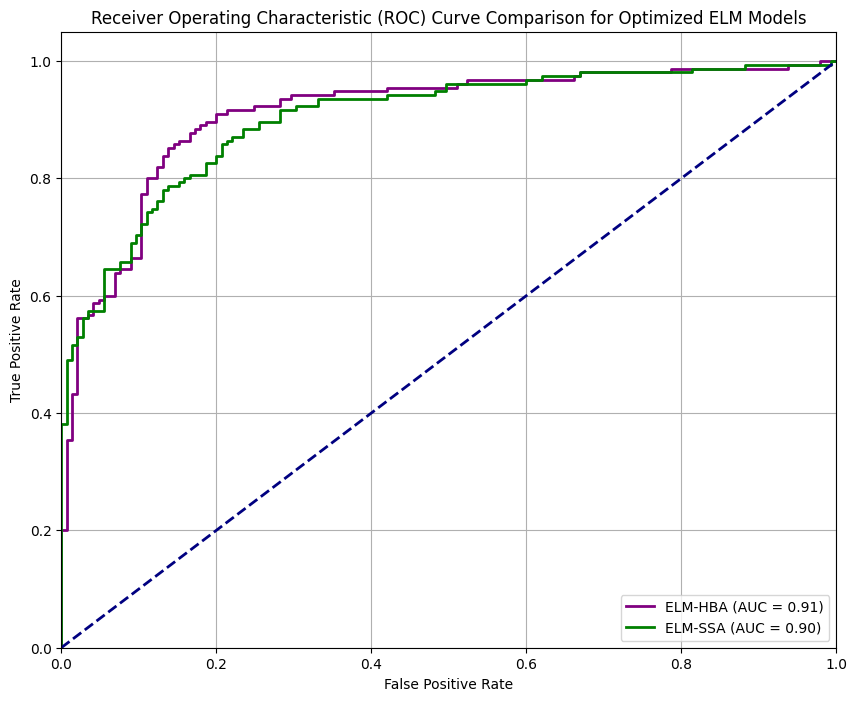

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # Used for generating dummy data

# --- ELM Class Definition (updated to return probabilities) ---
class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(self.input_size, self.hidden_size)
        self.bias = np.random.randn(self.hidden_size)
        self.output_weights = None
        self.one_hot = False
        self.classes = None

    def _activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation

    def fit(self, X, y):
        if len(np.unique(y)) > 2:
            self.one_hot = True
            self.classes = np.unique(y)
            y_onehot = np.zeros((y.shape[0], len(self.classes)))
            for i, label in enumerate(y):
                y_onehot[i, np.where(self.classes == label)[0][0]] = 1
            y = y_onehot
        else:
            self.one_hot = False
            y = np.array(y).reshape(-1, 1)

        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        self.output_weights = np.dot(np.linalg.pinv(H), y)

    def predict(self, X, return_probabilities=False): # Added return_probabilities parameter
        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        y_pred = np.dot(H, self.output_weights)

        if self.one_hot:
            if return_probabilities:
                exp_y_pred = np.exp(y_pred - np.max(y_pred, axis=1, keepdims=True))
                return exp_y_pred / np.sum(exp_y_pred, axis=1, keepdims=True)
            else:
                return self.classes[np.argmax(y_pred, axis=1)]
        else:
            if return_probabilities:
                return 1 / (1 + np.exp(-y_pred)).flatten()
            else:
                return (y_pred > 0.5).astype(int).flatten()

# --- Dummy Data Generation (if X_train, y_train, X_test, y_test are not defined) ---
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split X_train for validation set used by optimizers
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# ----------------------------------------------------------------------------------

# --- Fitness Function for ELM ---
def fitness_function_elm(hidden_size_param, X_train, y_train, X_val, y_val):
    hidden_size = int(hidden_size_param[0])
    hidden_size = max(1, min(hidden_size, 500))
    elm = ELM(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1)
    elm.fit(X_train, y_train)
    # Note: For fitness, we use the predicted class labels for accuracy
    y_pred = elm.predict(X_val, return_probabilities=False)
    return 1 - accuracy_score(y_val, y_pred)

# --- Honey Badger Algorithm (HBA) for ELM ---
def honey_badger_elm(X_train, y_train, X_val, y_val, n_agents=10, max_iter=20):
    lb = np.array([10])
    ub = np.array([500])
    # Initialize agents' positions randomly within bounds (as floats)
    agents = np.random.uniform(low=lb, high=ub, size=(n_agents, 1))
    best_fitness = float("inf")
    best_position = None

    for iter_num in range(max_iter):
        alpha = 2 * np.exp(-4 * (iter_num / max_iter) ** 2)
        for i in range(n_agents):
            fitness = fitness_function_elm(agents[i], X_train, y_train, X_val, y_val)
            if fitness < best_fitness:
                best_fitness = fitness
                best_position = agents[i].copy()
        for i in range(n_agents):
            F = alpha * np.random.rand()
            rand_agent_idx = np.random.randint(n_agents)
            while rand_agent_idx == i:
                rand_agent_idx = np.random.randint(n_agents)
            rand_agent = agents[rand_agent_idx]

            if np.random.rand() < 0.5:
                agents[i] += F * (rand_agent - agents[i])
            else:
                agents[i] += F * (best_position - agents[i]) + np.random.randn(1) * (ub - lb) * 0.01
            agents[i] = np.clip(agents[i], lb, ub)
    return int(best_position[0])

# --- Salp Swarm Algorithm (SSA) for ELM ---
def salp_swarm_elm(X_train, y_train, X_val, y_val, n_salps=10, max_iter=20):
    lb = np.array([10])
    ub = np.array([500])
    # Initialize salps' positions randomly within bounds (as floats)
    salps = np.random.uniform(low=lb, high=ub, size=(n_salps, 1))
    food_position = None
    food_fitness = float("inf")
    for iter_num in range(max_iter):
        c1 = 2 * np.exp(-(4 * iter_num / max_iter) ** 2)
        for i in range(n_salps):
            fitness = fitness_function_elm(salps[i], X_train, y_train, X_val, y_val)
            if fitness < food_fitness:
                food_fitness = fitness
                food_position = salps[i].copy()
        for i in range(n_salps):
            for j in range(1):
                if i == 0:
                    c2 = np.random.rand()
                    c3 = np.random.rand()
                    if c3 < 0.5:
                        salps[i, j] = food_position[j] + c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                    else:
                        salps[i, j] = food_position[j] - c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                else:
                    salps[i, j] = (salps[i, j] + salps[i - 1, j]) / 2.0
            salps[i] = np.clip(salps[i], lb, ub)
    return int(food_position[0])

# --- Main Execution and Evaluation ---

print("Starting ELM Optimization with HBA and SSA...")

# ELM-HBA Optimization and Evaluation
best_hidden_hba = honey_badger_elm(X_sub_train, y_sub_train, X_val, y_val)
print(f"\nHBA-Optimized Best Hidden Size for ELM: {best_hidden_hba}")

elm_hba = ELM(input_size=X_train.shape[1], hidden_size=best_hidden_hba, output_size=1)
elm_hba.fit(X_train, y_train)
y_pred_elm_hba = elm_hba.predict(X_test, return_probabilities=False) # For accuracy and classification report
y_pred_proba_elm_hba = elm_hba.predict(X_test, return_probabilities=True) # For ROC curve

print("\n--- ELM (HBA-Optimized) Metrics ---")
elm_hba_acc = accuracy_score(y_test, y_pred_elm_hba)
print(f"Optimized ELM Accuracy (HBA): {elm_hba_acc:.4f}")
print("Classification Report (ELM-HBA):")
print(classification_report(y_test, y_pred_elm_hba, zero_division=0))

# Calculate Sensitivity and Specificity for ELM-HBA
cm_hba = confusion_matrix(y_test, y_pred_elm_hba)
TN_hba, FP_hba, FN_hba, TP_hba = cm_hba.ravel()
sensitivity_hba = TP_hba / (TP_hba + FN_hba) if (TP_hba + FN_hba) != 0 else 0
specificity_hba = TN_hba / (TN_hba + FP_hba) if (TN_hba + FP_hba) != 0 else 0
print(f"Sensitivity (Recall of Positive Class) (ELM-HBA): {sensitivity_hba:.4f}")
print(f"Specificity (True Negative Rate) (ELM-HBA): {specificity_hba:.4f}")


print("\n" + "="*50 + "\n") # Separator

# ELM-SSA Optimization and Evaluation
best_hidden_ssa = salp_swarm_elm(X_sub_train, y_sub_train, X_val, y_val)
print(f"\nSSA-Optimized Best Hidden Size for ELM: {best_hidden_ssa}")

elm_ssa = ELM(input_size=X_train.shape[1], hidden_size=best_hidden_ssa, output_size=1)
elm_ssa.fit(X_train, y_train)
y_pred_elm_ssa = elm_ssa.predict(X_test, return_probabilities=False) # For accuracy and classification report
y_pred_proba_elm_ssa = elm_ssa.predict(X_test, return_probabilities=True) # For ROC curve

print("\n--- ELM (SSA-Optimized) Metrics ---")
elm_ssa_acc = accuracy_score(y_test, y_pred_elm_ssa)
print(f"Optimized ELM Accuracy (SSA): {elm_ssa_acc:.4f}")
print("Classification Report (ELM-SSA):")
print(classification_report(y_test, y_pred_elm_ssa, zero_division=0))

# Calculate Sensitivity and Specificity for ELM-SSA
cm_ssa = confusion_matrix(y_test, y_pred_elm_ssa)
TN_ssa, FP_ssa, FN_ssa, TP_ssa = cm_ssa.ravel()
sensitivity_ssa = TP_ssa / (TP_ssa + FN_ssa) if (TP_ssa + FN_ssa) != 0 else 0
specificity_ssa = TN_ssa / (TN_ssa + FP_ssa) if (TN_ssa + FP_ssa) != 0 else 0
print(f"Sensitivity (Recall of Positive Class) (ELM-SSA): {sensitivity_ssa:.4f}")
print(f"Specificity (True Negative Rate) (ELM-SSA): {specificity_ssa:.4f}")

# --- Plotting ROC Curves ---
# Calculate ROC for ELM-HBA
fpr_hba, tpr_hba, _ = roc_curve(y_test, y_pred_proba_elm_hba)
roc_auc_hba = roc_auc_score(y_test, y_pred_proba_elm_hba)

# Calculate ROC for ELM-SSA
fpr_ssa, tpr_ssa, _ = roc_curve(y_test, y_pred_proba_elm_ssa)
roc_auc_ssa = roc_auc_score(y_test, y_pred_proba_elm_ssa)

plt.figure(figsize=(10, 8))
plt.plot(fpr_hba, tpr_hba, color='purple', lw=2, label=f'ELM-HBA (AUC = {roc_auc_hba:.2f})')
plt.plot(fpr_ssa, tpr_ssa, color='green', lw=2, label=f'ELM-SSA (AUC = {roc_auc_ssa:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison for Optimized ELM Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [63]:
# Accuracy Summary
print("\n====== Final Accuracy Summary ======")
print(f"1. Decision Tree (Baseline):         {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"2. ELM (Baseline):                   {elm_accuracy:.4f}")
print(f"3. Decision Tree (HBA):              {hba_accuracy:.4f}")
print(f"4. Decision Tree (SSA):              {ssa_accuracy:.4f}")
print(f"5. ELM Optimized (HBA):              {elm_hba_acc:.4f}")
print(f"6. ELM Optimized (SSA):              {elm_ssa_acc:.4f}")



====== Final Accuracy Summary ======
1. Decision Tree (Baseline):         0.8567
2. ELM (Baseline):                   0.8233
3. Decision Tree (HBA):              0.8833
4. Decision Tree (SSA):              0.8833
5. ELM Optimized (HBA):              0.8400
6. ELM Optimized (SSA):              0.8200


--- Running Baseline Models ---

--- Running Optimized Models ---
Optimizing Decision Tree with HBA...
HBA-Optimized DT Params: [ 5 10]

Optimizing Decision Tree with SSA...
SSA-Optimized DT Params: [5 8]

Optimizing ELM with HBA...
HBA-Optimized ELM Hidden Size: 45

Optimizing ELM with SSA...
SSA-Optimized ELM Hidden Size: 295

                     Comprehensive Model Performance Summary
Model                            Accuracy  Precision     Recall   F1-Score Sensitivity Specificity      AUC
--------------------------------------------------------------------------------
Decision Tree (Baseline)           0.8567     0.8636     0.8581     0.8608     0.8581     0.8552   0.8566
ELM (Baseline)                     0.8233     0.8542     0.7935     0.8227     0.7935     0.8552   0.8905
Decision Tree (HBA)                0.8833     0.9167     0.8516     0.8829     0.8516     0.9172   0.8965
Decision Tree (SSA)                0.8833     0.9167     0.8516     0.8829     0.8516     0.9172   0.

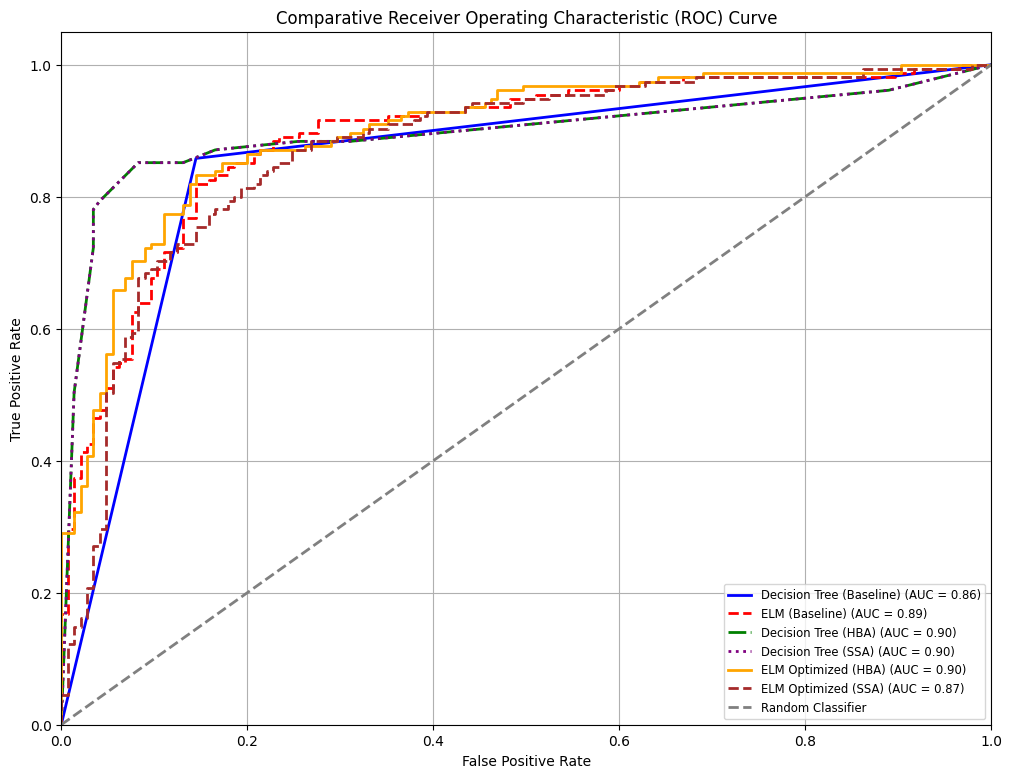

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # Used for generating dummy data

# --- ELM Class Definition ---
class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(self.input_size, self.hidden_size)
        self.bias = np.random.randn(self.hidden_size)
        self.output_weights = None
        self.one_hot = False
        self.classes = None

    def _activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation

    def fit(self, X, y):
        if len(np.unique(y)) > 2:
            self.one_hot = True
            self.classes = np.unique(y)
            y_onehot = np.zeros((y.shape[0], len(self.classes)))
            for i, label in enumerate(y):
                y_onehot[i, np.where(self.classes == label)[0][0]] = 1
            y = y_onehot
        else:
            self.one_hot = False
            y = np.array(y).reshape(-1, 1)

        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        self.output_weights = np.dot(np.linalg.pinv(H), y)

    def predict(self, X, return_probabilities=False):
        H = self._activation(np.dot(X, self.input_weights) + self.bias)
        y_pred = np.dot(H, self.output_weights)
        if self.one_hot:
            if return_probabilities:
                exp_y_pred = np.exp(y_pred - np.max(y_pred, axis=1, keepdims=True))
                return exp_y_pred / np.sum(exp_y_pred, axis=1, keepdims=True)
            else:
                return self.classes[np.argmax(y_pred, axis=1)]
        else:
            if return_probabilities:
                return 1 / (1 + np.exp(-y_pred)).flatten()
            else:
                return (y_pred > 0.5).astype(int).flatten()

# --- Optimization Algorithm Fitness Functions ---

# Fitness function for Decision Tree
def fitness_function_dt(params, X_train, y_train, X_val, y_val):
    max_depth = int(params[0])
    min_samples_split = int(params[1])
    if max_depth < 1: max_depth = 1
    if min_samples_split < 2: min_samples_split = 2
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    return 1 - accuracy_score(y_val, y_pred) # Minimize 1-accuracy

# Fitness function for ELM
def fitness_function_elm(hidden_size_param, X_train, y_train, X_val, y_val):
    hidden_size = int(hidden_size_param[0])
    hidden_size = max(1, min(hidden_size, 500))
    elm = ELM(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1)
    elm.fit(X_train, y_train)
    y_pred = elm.predict(X_val, return_probabilities=False)
    return 1 - accuracy_score(y_val, y_pred)

# --- Honey Badger Algorithm (HBA) ---
def honey_badger_optimizer(X_train, y_train, X_val, y_val, fitness_func, param_bounds, n_agents=10, max_iter=20):
    dim = len(param_bounds[0])
    lb = np.array(param_bounds[0])
    ub = np.array(param_bounds[1])

    agents = np.random.uniform(low=lb, high=ub, size=(n_agents, dim))
    best_fitness = float("inf")
    best_position = None

    for iter_num in range(max_iter):
        alpha = 2 * np.exp(-4 * (iter_num / max_iter) ** 2)
        for i in range(n_agents):
            fitness = fitness_func(agents[i], X_train, y_train, X_val, y_val)
            if fitness < best_fitness:
                best_fitness = fitness
                best_position = agents[i].copy()
        for i in range(n_agents):
            F = alpha * np.random.rand()
            rand_agent_idx = np.random.randint(n_agents)
            while rand_agent_idx == i:
                rand_agent_idx = np.random.randint(n_agents)
            rand_agent = agents[rand_agent_idx]

            if np.random.rand() < 0.5:
                agents[i] += F * (rand_agent - agents[i])
            else:
                agents[i] += F * (best_position - agents[i]) + np.random.randn(dim) * (ub - lb) * 0.01
            agents[i] = np.clip(agents[i], lb, ub)
    return best_position.astype(int) if dim > 1 else int(best_position[0])

# --- Salp Swarm Algorithm (SSA) ---
def salp_swarm_optimizer(X_train, y_train, X_val, y_val, fitness_func, param_bounds, n_salps=10, max_iter=20):
    dim = len(param_bounds[0])
    lb = np.array(param_bounds[0])
    ub = np.array(param_bounds[1])

    salps = np.random.uniform(low=lb, high=ub, size=(n_salps, dim))
    food_position = None
    food_fitness = float("inf")

    for iter_num in range(max_iter):
        c1 = 2 * np.exp(-(4 * iter_num / max_iter) ** 2)
        for i in range(n_salps):
            fitness = fitness_func(salps[i], X_train, y_train, X_val, y_val)
            if fitness < food_fitness:
                food_fitness = fitness
                food_position = salps[i].copy()
        for i in range(n_salps):
            for j in range(dim):
                if i == 0:
                    c2 = np.random.rand()
                    c3 = np.random.rand()
                    if c3 < 0.5:
                        salps[i, j] = food_position[j] + c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                    else:
                        salps[i, j] = food_position[j] - c1 * ((ub[j] - lb[j]) * c2 + lb[j])
                else:
                    salps[i, j] = (salps[i, j] + salps[i - 1, j]) / 2.0
            salps[i] = np.clip(salps[i], lb, ub)
    return food_position.astype(int) if dim > 1 else int(food_position[0])

# --- Metric Calculation Helper ---
def calculate_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

    # For binary classification, typically we care about class 1 (positive class)
    precision = report['1']['precision'] if '1' in report else 0
    recall = report['1']['recall'] if '1' in report else 0
    f1 = report['1']['f1-score'] if '1' in report else 0

    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = 0, 0, 0, 0
    if cm.shape == (2, 2):
        TN, FP, FN, TP = cm.ravel()

    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    roc_auc = roc_auc_score(y_true, y_proba)
    fpr, tpr, _ = roc_curve(y_true, y_proba)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr
    }

# --- Data Generation (Replace with your dataset loading) ---
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train-validation split for optimizer
X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# -----------------------------------------------------------

all_model_metrics = {}

print("--- Running Baseline Models ---")
# 1. Decision Tree (Baseline)
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)
y_pred_dt_baseline = dt_baseline.predict(X_test)
y_proba_dt_baseline = dt_baseline.predict_proba(X_test)[:, 1]
all_model_metrics['Decision Tree (Baseline)'] = calculate_metrics(y_test, y_pred_dt_baseline, y_proba_dt_baseline)

# 2. ELM (Baseline)
elm_baseline = ELM(input_size=X_train.shape[1], hidden_size=100, output_size=1)
elm_baseline.fit(X_train, y_train)
y_pred_elm_baseline = elm_baseline.predict(X_test, return_probabilities=False)
y_proba_elm_baseline = elm_baseline.predict(X_test, return_probabilities=True)
all_model_metrics['ELM (Baseline)'] = calculate_metrics(y_test, y_pred_elm_baseline, y_proba_elm_baseline)

print("\n--- Running Optimized Models ---")
# Parameter bounds for DT (max_depth, min_samples_split)
dt_param_bounds = ([1, 2], [20, 20])
# Parameter bounds for ELM (hidden_size)
elm_param_bounds = ([10], [500])


# 3. Decision Tree (HBA-Optimized)
print("Optimizing Decision Tree with HBA...")
best_params_dt_hba = honey_badger_optimizer(
    X_sub_train, y_sub_train, X_val, y_val,
    fitness_func=fitness_function_dt, param_bounds=dt_param_bounds
)
print(f"HBA-Optimized DT Params: {best_params_dt_hba}")
dt_hba = DecisionTreeClassifier(max_depth=best_params_dt_hba[0], min_samples_split=best_params_dt_hba[1], random_state=42)
dt_hba.fit(X_train, y_train)
y_pred_dt_hba = dt_hba.predict(X_test)
y_proba_dt_hba = dt_hba.predict_proba(X_test)[:, 1]
all_model_metrics['Decision Tree (HBA)'] = calculate_metrics(y_test, y_pred_dt_hba, y_proba_dt_hba)


# 4. Decision Tree (SSA-Optimized)
print("\nOptimizing Decision Tree with SSA...")
best_params_dt_ssa = salp_swarm_optimizer(
    X_sub_train, y_sub_train, X_val, y_val,
    fitness_func=fitness_function_dt, param_bounds=dt_param_bounds
)
print(f"SSA-Optimized DT Params: {best_params_dt_ssa}")
dt_ssa = DecisionTreeClassifier(max_depth=best_params_dt_ssa[0], min_samples_split=best_params_dt_ssa[1], random_state=42)
dt_ssa.fit(X_train, y_train)
y_pred_dt_ssa = dt_ssa.predict(X_test)
y_proba_dt_ssa = dt_ssa.predict_proba(X_test)[:, 1]
all_model_metrics['Decision Tree (SSA)'] = calculate_metrics(y_test, y_pred_dt_ssa, y_proba_dt_ssa)


# 5. ELM (HBA-Optimized)
print("\nOptimizing ELM with HBA...")
best_hidden_hba_elm = honey_badger_optimizer(
    X_sub_train, y_sub_train, X_val, y_val,
    fitness_func=fitness_function_elm, param_bounds=elm_param_bounds
)
print(f"HBA-Optimized ELM Hidden Size: {best_hidden_hba_elm}")
elm_hba = ELM(input_size=X_train.shape[1], hidden_size=best_hidden_hba_elm, output_size=1)
elm_hba.fit(X_train, y_train)
y_pred_elm_hba = elm_hba.predict(X_test, return_probabilities=False)
y_proba_elm_hba = elm_hba.predict(X_test, return_probabilities=True)
all_model_metrics['ELM Optimized (HBA)'] = calculate_metrics(y_test, y_pred_elm_hba, y_proba_elm_hba)


# 6. ELM (SSA-Optimized)
print("\nOptimizing ELM with SSA...")
best_hidden_ssa_elm = salp_swarm_optimizer(
    X_sub_train, y_sub_train, X_val, y_val,
    fitness_func=fitness_function_elm, param_bounds=elm_param_bounds
)
print(f"SSA-Optimized ELM Hidden Size: {best_hidden_ssa_elm}")
elm_ssa = ELM(input_size=X_train.shape[1], hidden_size=best_hidden_ssa_elm, output_size=1)
elm_ssa.fit(X_train, y_train)
y_pred_elm_ssa = elm_ssa.predict(X_test, return_probabilities=False)
y_proba_elm_ssa = elm_ssa.predict(X_test, return_probabilities=True)
all_model_metrics['ELM Optimized (SSA)'] = calculate_metrics(y_test, y_pred_elm_ssa, y_proba_elm_ssa)


# --- Consolidated Parameter Summary ---
print("\n" + "="*80)
print("                     Comprehensive Model Performance Summary")
print("="*80)
header = "{:<30} {:>10} {:>10} {:>10} {:>10} {:>10} {:>10} {:>8}".format(
    "Model", "Accuracy", "Precision", "Recall", "F1-Score", "Sensitivity", "Specificity", "AUC"
)
print(header)
print("-" * 80)

for model_name, metrics in all_model_metrics.items():
    print("{:<30} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f} {:>8.4f}".format(
        model_name,
        metrics['Accuracy'],
        metrics['Precision'],
        metrics['Recall'],
        metrics['F1-Score'],
        metrics['Sensitivity'],
        metrics['Specificity'],
        metrics['AUC']
    ))
print("="*80)

# --- Comparative ROC Plot ---
plt.figure(figsize=(12, 9))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
linestyles = ['-', '--', '-.', ':', '-', '--']

for i, (model_name, metrics) in enumerate(all_model_metrics.items()):
    plt.plot(metrics['FPR'], metrics['TPR'], color=colors[i], linestyle=linestyles[i], lw=2,
             label=f'{model_name} (AUC = {metrics["AUC"]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.show()